In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [4]:
df = pd.read_csv('./data/sample_negative_emotion_clean.csv', index_col= 0)
df

,ad,neg_emo
0,see why everyone is celebrating at hoblit dodg...,0
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,0
3,we have until march st to raise money for our ...,0
4,learn how to use the new staffing law to impro...,0
...,...,...
195,ukraine needs your support\r\nany donation you...,0
196,help odessa help ukraine\r\nyour donations go ...,0
197,hundreds have been killed and scores more infl...,1
198,end of month is tomorrow less than hours to ...,0


In [5]:
# creating prediction model

# creating the filters 
filters =  ['suffering', 'suffered','nightmare','forced','abuse','abused','burden','getting worse','horror','violence',
                    'catastrophe','affraid','cruelty','deadly','terror', 'danger', 'dangerous',  'regret', 'regretted', 'rejection', 
                    'reject','rejected', 'risk', 'risked', 'sabotage', 'sabotaged', 'sabotaging', 'scary', 'scared','suffer', 'threat',
                    'threatened', 'threatening', 'tragic', 'tragically', 'tragical', 'trapped' , 'trap','fail', 'fails', 'failed', 'failing', 
                    'victim', 'fooled','fooling', 'helpless', 'hurting', 'hurt', 'scared','mistake' , 'mistaken', 'neglect','neglected', 'neglecting', 
                    'pitfalls', 'powerless', 'vulnerable', 'waste', 'wasted','wasting', 'worry', 'worried', 'worrying', 'disappointed', 'dissapoint', 
                    'dissapointing','frustrated', 'frsutrating', 'greedy',  'greed','irritated',  'maddening', 'mad', 'ruthless',  'misleading', 
                    'frustration','infuriating','infuriated', 'pointless', 'reclaim', 'reclaimed', 'sick', 'tired', 'tiring', 'swindled', 'swindle',
                    'trigger', 'triggered', 'unacceptable', 'violate', 'uncomfortable', 'victim', 'risking', 'critcial', 'critically', 
                    'concerning', 'concerned', 'problamatic', 'drastic', 'drastiaclly', 'hardship', 'hardships', 'rigging', 'rape', 'raped', 
                    'assault', 'assaulted', 'assaulting', 'insult', 'insulting', 'murder', 'weapon',  'rigged', 'desperate', 'desperated', 
                    'danger', 'regret',  'risk', 'sabotage', 'scary','threat','tragic', 'helpless', 'hurting','vulnerable', 
                    'frustrated', 'greedy','irritated',  'violate' ]

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.795
                     precision    recall  f1-score   support

no negative emotion       0.74      0.92      0.82       100
   negative emotion       0.89      0.67      0.77       100

           accuracy                           0.80       200
          macro avg       0.81      0.80      0.79       200
       weighted avg       0.81      0.80      0.79       200

confusion matrix:
[[92  8]
 [33 67]]



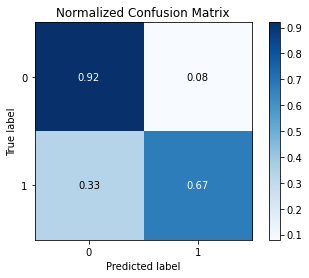

In [6]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['neg_emo'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['neg_emo'], y_pred, target_names=['no negative emotion', 'negative emotion']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['neg_emo'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['neg_emo'], y_pred, normalize=True)
plt.show()